In [1]:
## NEURAL NETWORK CLASSIFIER

In [2]:
import numpy as np
from Neural_Network import NN
import matplotlib.pyplot as plt

In [3]:
data=np.loadtxt(open('Corners.txt',"rt"),delimiter=" ")
np.random.shuffle(data)              #Randomnly shuffles the data

In [4]:
#Created instance of class
train=NN()

In [5]:
#Separates data into X and Y and normalizes X
X=data[:,:2]
Y=data[:,-1:]
X=train.normalize(X)

In [6]:
#dividing into training data and test data in the ratio 1:1
test_len=X.shape[0]//2
X_test=X[:test_len,:]
X_train=X[test_len:,:]

Y_test=Y[:test_len]
Y_train=Y[test_len:]

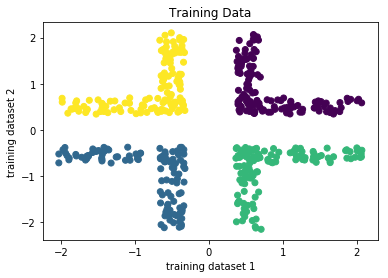

In [7]:
# VISUALIZATION of training data
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.flatten())
plt.xlabel("training dataset 1")
plt.ylabel("training dataset 2")
plt.title("Training Data")
plt.show()

In [8]:
#fits the training set and internally optimizes the values of weights and bias 
train.fit(X_train,Y_train)

In [9]:
#predicts the values of the test data
Y_pred = train.pred(X_test)        

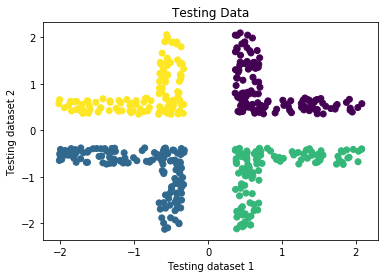

In [10]:
# VISUALIZATION of predicted data
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred)
plt.xlabel("Testing dataset 1")
plt.ylabel("Testing dataset 2")
plt.title("Testing Data")
plt.show()

In [11]:
#Calculating accuarcy of my model
Acc = train.accuracy(Y_test,Y_pred)
print("Accuracy of my model: ",Acc," %")

Accuracy of my model:  100.0  %


In [12]:
#calculating accuracy of sklearn model
from sklearn.neural_network import MLPClassifier
c = MLPClassifier(solver='lbfgs',batch_size=25,hidden_layer_sizes=(128))
c.fit(X_train, np.hstack(Y_train))
y_pred=c.predict(X_test)
A=(y_pred==Y_test.flatten())
acc=np.mean(A)*100
print("accuracy of sklearn: ",acc,"%")

accuracy of sklearn:  100.0 %
